In [1]:
from IPython.display import display_markdown
from xray_fov.paths import paths, outs
from xray_fov.data.dicom import dicom_directory
from xray_fov.plot.noise import plot_noise_stats

# phantom-alex | muas

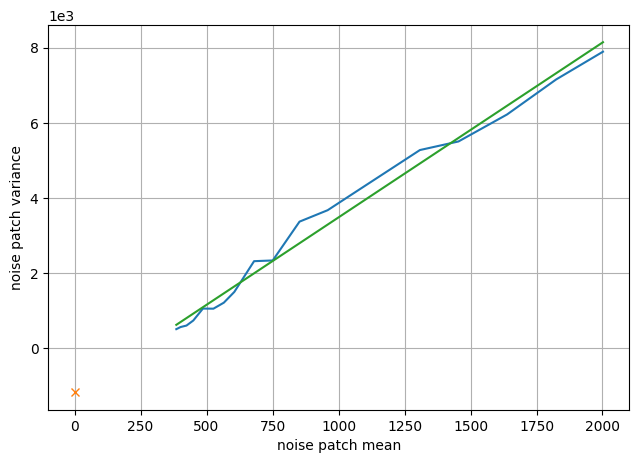

# phantom-alex | photons

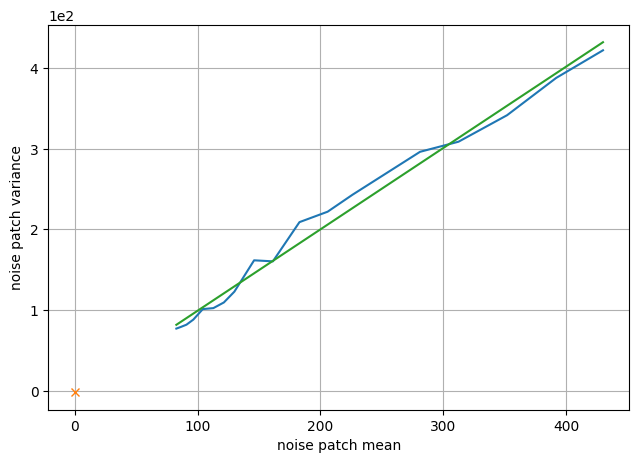

# phantom-alex | thinned

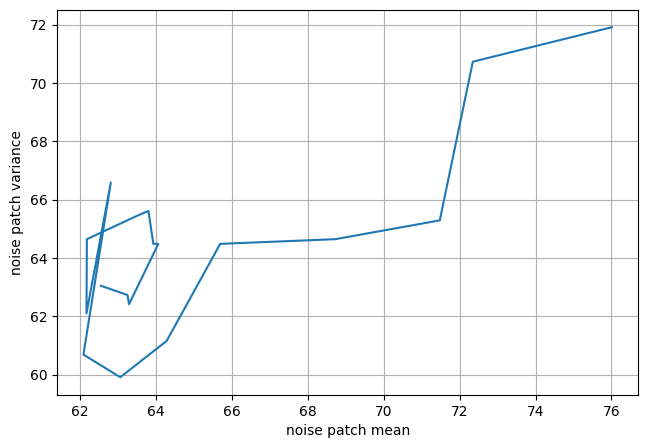

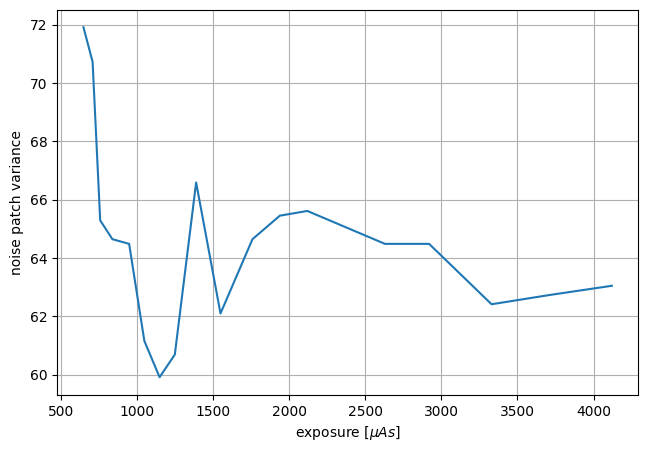

# phantom | muas

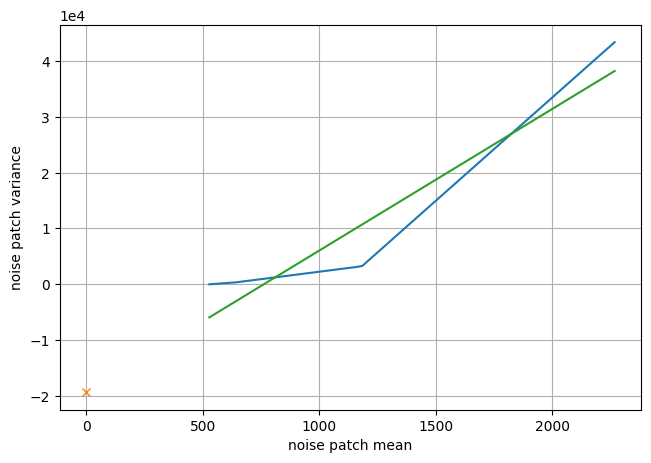

# phantom | photons

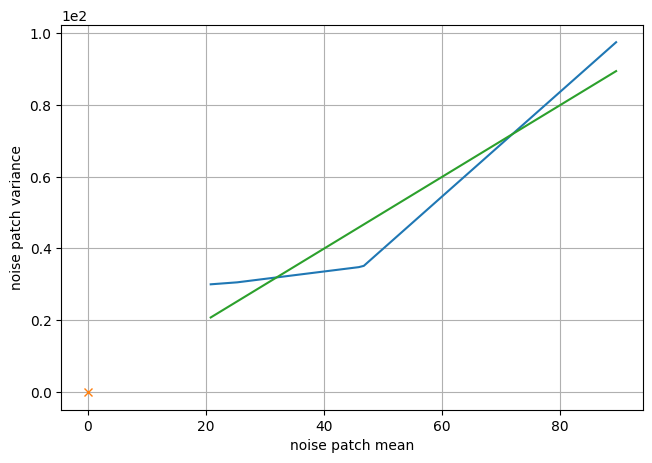

# phantom | thinned

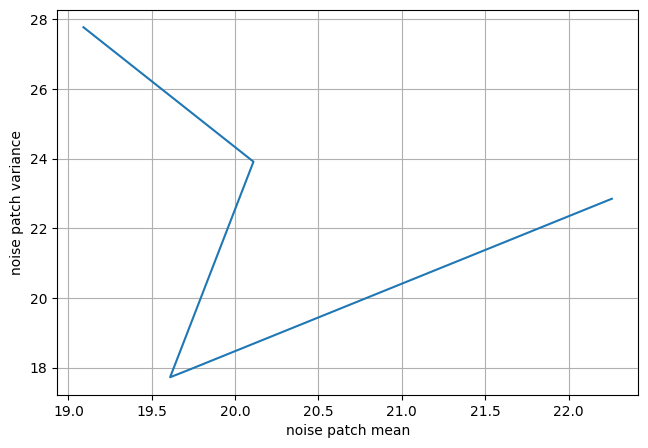

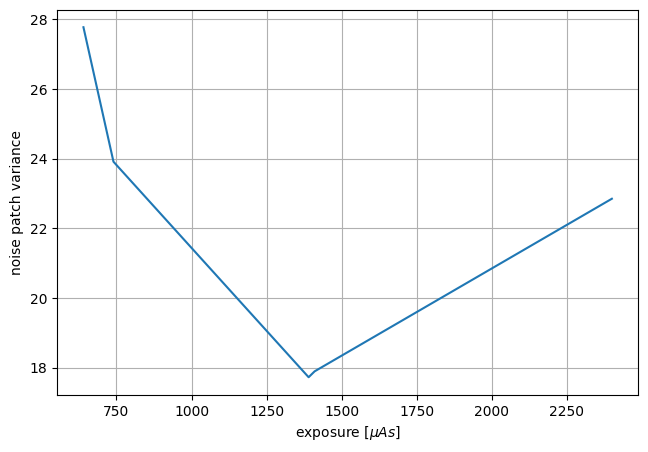

# air | muas

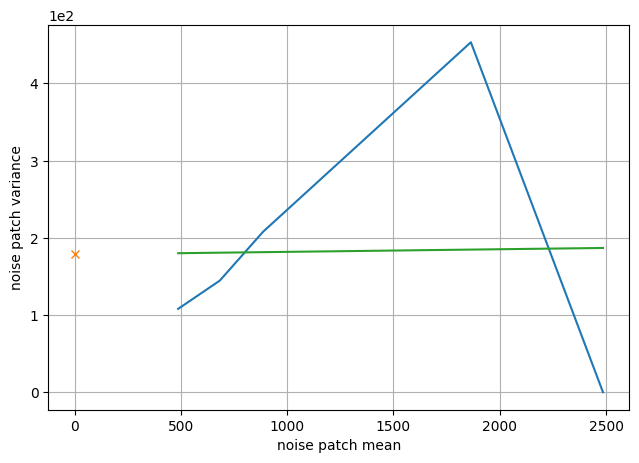

# air | photons

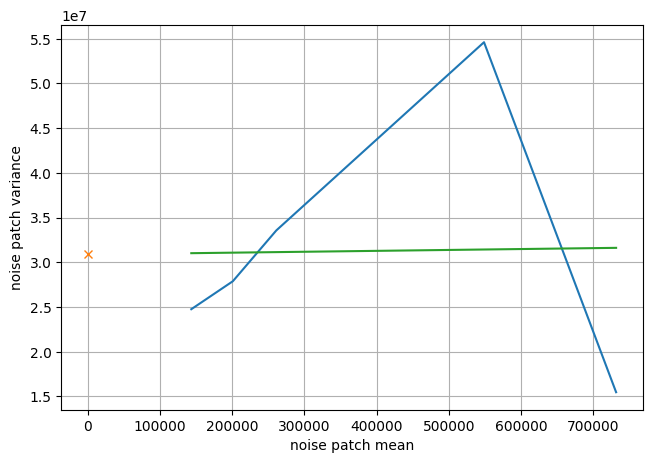

# air | thinned

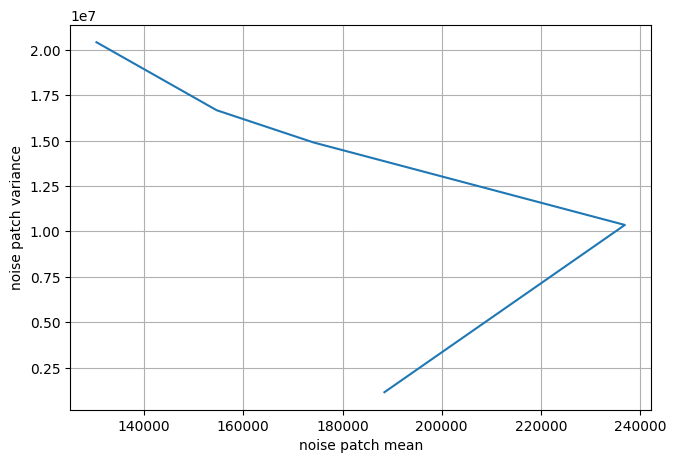

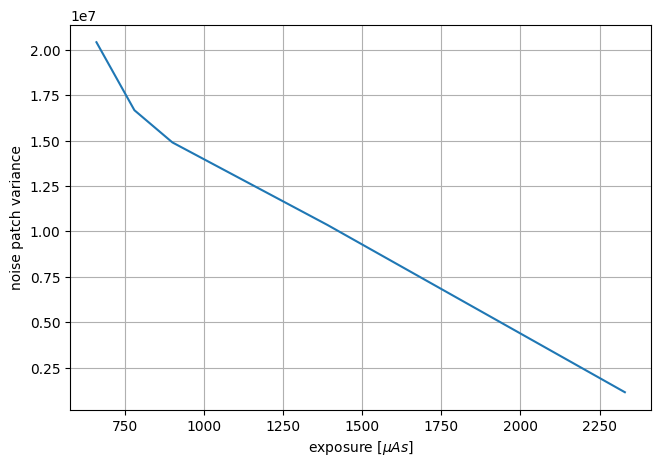

In [2]:
dicoms_phantom = dicom_directory(paths["dicom"]["phantom"], noise_patch_range=(1000, 50))
for key, path in paths["dicom"].items():
    if "noxray" not in key:
        for kind in ["muas", "photons", "thinned"]:
            if "alex" in key:
                dicoms = dicom_directory(path, noise_patch_size=(250,75), noise_patch_range=(700, 425))
            else:
                dicoms = dicom_directory(path, noise_patch_range=(1000, 50))
            
            display_markdown(f"# {key} | {kind}", raw=True)
            fig = plot_noise_stats(dicoms, kind, plot_lstsq=("thinned" not in kind))
            fig.savefig(outs["phantom-noise-stats"]+f"/{key}_{kind}.svg")
            fig.savefig(outs["phantom-noise-stats"]+f"/{key}_{kind}.jpg")
            display(fig)
            if "thinned" in kind:
                fig = plot_noise_stats(dicoms, kind, plot_exposures=True, plot_lstsq=False)
                fig.savefig(outs["phantom-noise-stats"]+f"/{key}_{kind}-exposure.svg")
                fig.savefig(outs["phantom-noise-stats"]+f"/{key}_{kind}-exposure.jpg")
                display(fig)